<a href="https://colab.research.google.com/github/joypatel18/university-project/blob/main/programing_da_code_marketing_22048830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/programming-A/Marketing_Campaign_data.csv')
df

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,102996,M,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,0,0,1,1,0,I purchased a new computer from your store rec...
1496,102997,M,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,1,1,0,0,The new affinity card is great. Thank you. I d...
1497,102998,M,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,1,0,0,I wanted to write you to let you know that I'v...
1498,102999,M,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,0,0,1,1,1,0,0,My sister told me about your store and I was i...


## 1. Data Understanding

In [ ]:
#Defining a function to generate metadata for each column
def generate_metadata(col):
    metadata = {}
    metadata['Data Type'] = col.dtype
    metadata['Count'] = len(col)
    metadata['Unique Values'] = len(col.unique())
    metadata['Missing Values'] = col.isnull().sum()
    metadata['% Missing Values'] = round((col.isnull().sum() / len(col)) * 100, 2)
    return pd.Series(metadata)
#Generating metadata for each column
metadata_table = df.apply(generate_metadata).T
metadata_table.index.name = 'Attribute'
#Printing metadata table
print(metadata_table)
# Describe missing or error data for each attribute
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(f"{col} has {missing_values} missing values.")
    if df[col].dtype == 'object':
        error_values = df[col][~df[col].isin(['Yes', 'No', 'Unknown'])].count()
        if error_values > 0:
            print(f"{col} has {error_values} error values.")

                        Data Type Count Unique Values Missing Values  \
Attribute                                                              
CUST_ID                     int64  1500          1500              0   
CUST_GENDER                object  1500             2              0   
AGE                         int64  1500            66              0   
CUST_MARITAL_STATUS        object  1500             7              0   
COUNTRY_NAME               object  1500            19              0   
CUST_INCOME_LEVEL          object  1500            12              0   
EDUCATION                  object  1500            16              0   
OCCUPATION                 object  1500            15              0   
HOUSEHOLD_SIZE             object  1500             6              0   
YRS_RESIDENCE               int64  1500            15              0   
AFFINITY_CARD               int64  1500             2              0   
BULK_PACK_DISKETTES         int64  1500             2           

## 2. Data Preparation

In [ ]:
#Dropping variables that have no impact on the analysis
df.drop(['CUST_ID', 'COMMENTS'], axis=1, inplace=True)
#Printing the dataframe after reducing variables
df.head()

Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Cleaning the Data
import numpy as np
# Replace unknown values with NaN
df.replace('Unknown', pd.np.nan, inplace=True)
# Remove duplicate rows
df.drop_duplicates(inplace=True)
# Print the dataframe after cleaning data
df.head()

<ipython-input-5-3c586f9451aa>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('Unknown', pd.np.nan, inplace=True)


Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Converting to integer
#Mapping CUST_GENDER to binary values
df['CUST_GENDER'] = df['CUST_GENDER'].map({'F': 0, 'M': 1})
# Print the dataframe after transforming CUST_GENDER
df.head()

Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Creating a dictionary mapping each country to its occurrence count
country_count = dict(df['COUNTRY_NAME'].value_counts())
print(country_count)
#Mapping COUNTRY_NAME to ordinal values
df['COUNTRY_NAME'] = df['COUNTRY_NAME'].map(country_count)
#Printing the dataframe after transforming COUNTRY_NAME in descending order
df.head()

{1335: 1335, 46: 46, 37: 37, 8: 16, 14: 14, 10: 10, 9: 9, 4: 8, 7: 7, 6: 6, 3: 3}


Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,1335,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverM,1335,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverM,1335,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1335,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverM,1335,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Creating a dictionary to map income levels to ordinal numbers
income_map = {'A: Below 30,000': 1, 'B: 30,000 - 49,999': 2, 'C: 50,000 - 69,999': 3,
              'D: 70,000 - 89,999': 4, 'E: 90,000 - 109,999': 5, 'F: 110,000 - 129,999': 6,
              'G: 130,000 - 149,999': 7, 'H: 150,000 - 169,999': 8, 'I: 170,000 - 189,999': 9,
              'J: 190,000 - 249,999': 10, 'K: 250,000 - 299,999': 11, 'L: 300,000 and above': 12}
#Using the map function to transform the values in the column
df['CUST_INCOME_LEVEL'] = df['CUST_INCOME_LEVEL'].map(income_map)
df.head()

Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,1335,10,Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverM,1335,9,Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverM,1335,8,HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1335,2,Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverM,1335,11,Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Creating a dictionary to map education levels to ordinal numbers based on USA education level
education_map = {'Presch.': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4, '10th': 5,
                 '11th': 6, '12th': 7, '< Bach.': 8, 'HS-grad': 9, 'Assoc-A': 10, 'Assoc-V': 11,
                 'Bach.': 12, 'Profsc': 13, 'Masters': 14, 'PhD': 15}
#Using the map function to transform the values in the column
df['EDUCATION'] = df['EDUCATION'].map(education_map)
#Sorting the ordinal values in descending order
df['EDUCATION'] = df['EDUCATION'].sort_values(ascending=False).values
#Printing the transformed dataframe
df.head()

Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,1335,10,15,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverM,1335,9,15,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverM,1335,8,15,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1335,2,15,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverM,1335,11,15,Sales,9+,5,1,1,1,0,1,1,0,0


In [ ]:
#Creating a dictionary to map household size to ordinal numbers based on number of rooms
household_map = {'1': 1, '2': 2, '3': 3, '4-May': 4, '06-Aug': 6, '9+': 9}
#Using the map function to transform the values in the column
df['HOUSEHOLD_SIZE'] = df['HOUSEHOLD_SIZE'].map(household_map)
#Printing the transformed dataframe
df.head()

Attribute,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,1335,10,15,Prof.,2.0,4,0,1,1,1,1,1,0,0
1,1,27,NeverM,1335,9,15,Sales,2.0,3,0,1,1,0,1,1,1,0
2,0,20,NeverM,1335,8,15,Cleric.,2.0,2,0,1,0,0,1,1,1,0
3,1,45,Married,1335,2,15,Exec.,3.0,5,1,0,0,1,1,1,0,0
4,1,34,NeverM,1335,11,15,Sales,9.0,5,1,1,1,0,1,1,0,0


## 3. Data Analysis

In [ ]:
#Summary Statistics
df.describe()

Attribute,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1372.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.0,1491.000000,1491.000000
mean,0.674715,38.931590,1198.189805,8.118042,9.266264,3.139213,4.093226,0.254192,0.626425,0.580148,0.575453,0.879946,1.0,0.285714,0.002012
std,0.468638,13.641799,400.386345,3.085278,2.565817,2.266750,1.922324,0.435552,0.483915,0.493700,0.494440,0.325133,0.0,0.451906,0.044826
min,0.000000,17.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,28.000000,1335.000000,6.000000,8.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,1.000000,37.000000,1335.000000,9.000000,9.000000,3.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,1.000000,47.000000,1335.000000,10.000000,11.500000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,1.000000,90.000000,1335.000000,12.000000,15.000000,9.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:
#Correlation of target variable with other variables
corr_matrix = df.corr()
#Extracting the correlation of each variable with the target variable and sort in ascending order
corr_with_target = corr_matrix['AFFINITY_CARD'].sort_values()
#Creating a new dataframe with the correlation of each variable with the target variable
corr_df = pd.DataFrame(corr_with_target)
#Renaming the column to 'Correlation with AFFINITY_CARD'
corr_df = corr_df.rename(columns={'AFFINITY_CARD': 'Correlation with AFFINITY_CARD'})
#Displaying the correlation matrix
print(corr_df)

                         Correlation with AFFINITY_CARD
Attribute                                              
Y_BOX_GAMES                                   -0.280576
HOUSEHOLD_SIZE                                -0.030493
FLAT_PANEL_MONITOR                            -0.027703
OS_DOC_SET_KANJI                              -0.026214
CUST_INCOME_LEVEL                             -0.023842
BULK_PACK_DISKETTES                           -0.017243
COUNTRY_NAME                                   0.032709
EDUCATION                                      0.039688
BOOKKEEPING_APPLICATION                        0.163507
CUST_GENDER                                    0.227805
AGE                                            0.245441
HOME_THEATER_PACKAGE                           0.283296
YRS_RESIDENCE                                  0.342008
AFFINITY_CARD                                  1.000000
PRINTER_SUPPLIES                                    NaN


<ipython-input-15-916932d0141b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<ipython-input-16-d14d51d5e2f5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['AFFINITY_CARD'].sort_values()


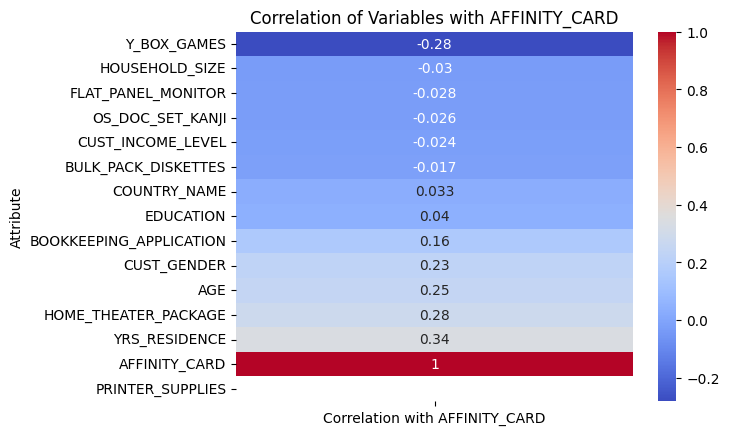

In [ ]:
#visulation of corelation with Affinity_card
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of each variable with the target variable
corr_matrix = df.corr()['AFFINITY_CARD'].sort_values()

# Extract the correlation of each variable with the target variable and sort in ascending order
#corr_with_target = corr_matrix['AFFINITY_CARD'].sort_values()

# Create a new dataframe with the correlation of each variable with the target variable
corr_df = pd.DataFrame(corr_with_target)

# Rename the column to 'Correlation with AFFINITY_CARD'
corr_df = corr_df.rename(columns={'AFFINITY_CARD': 'Correlation with AFFINITY_CARD'})

# Create the heatmap
sns.heatmap(corr_df, cmap='coolwarm', annot=True)

# Set the title of the heatmap
plt.title('Correlation of Variables with AFFINITY_CARD')

# Show the heatmap
plt.show()

## 4. Data Exploration

Enter a column name to plot histogram (or type 'exit' to quit): AFFINITY_CARD


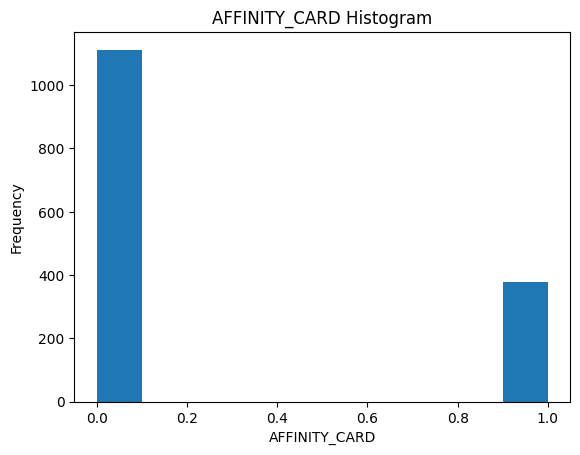

Enter a column name to plot histogram (or type 'exit' to quit): exit


In [ ]:
#Histogram
import matplotlib.pyplot as plt
# Function to plot histogram
def plot_histogram(df, column_name):
    plt.hist(df[column_name])
    plt.title(column_name + " Histogram")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()
#Looping to continuously ask for user input until they choose to exit
while True:
    column_name = input("Enter a column name to plot histogram (or type 'exit' to quit): ")
    if column_name == "exit":
        break
    elif column_name not in df.columns:
        print("Invalid column name, try again.")
    else:
        plot_histogram(df, column_name)

Enter the first variable name (or type 'exit' to quit): CUST_INCOME_LEVEL
Enter the second variable name: EDUCATION


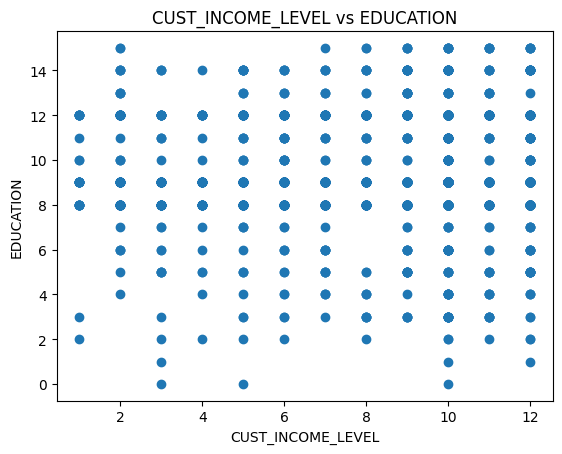

Enter the first variable name (or type 'exit' to quit): exit


In [ ]:
#Scatter Plot
# Loop to continuously ask for user input until they choose to exit
while True:
    # Ask the user for the first variable
    var1 = input("Enter the first variable name (or type 'exit' to quit): ")
    if var1 == "exit":
        break
    elif var1 not in df.columns:
        print("Invalid variable name, try again.")
        continue
    # Ask the user for the second variable
    var2 = input("Enter the second variable name: ")
    if var2 not in df.columns:
        print("Invalid variable name, try again.")
        continue
    # Create the scatter plot
    plt.scatter(df[var1], df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(var1 + " vs " + var2)
    plt.show()

In [ ]:
#Dropping two more variables that have no impact on the analysis
df.drop(['CUST_MARITAL_STATUS', 'OCCUPATION'], axis=1, inplace=True)
#Printing the dataframe after reducing variables
df.head()

Attribute,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,1335,10,15,2.0,4,0,1,1,1,1,1,0,0
1,1,27,1335,9,15,2.0,3,0,1,1,0,1,1,1,0
2,0,20,1335,8,15,2.0,2,0,1,0,0,1,1,1,0
3,1,45,1335,2,15,3.0,5,1,0,0,1,1,1,0,0
4,1,34,1335,11,15,9.0,5,1,1,1,0,1,1,0,0


In [ ]:
df['EDUCATION'].fillna(df['EDUCATION'].mode()[0], inplace=True)


## 5. Data Mining

Logistic Regression accuracy score: 0.7388392857142857


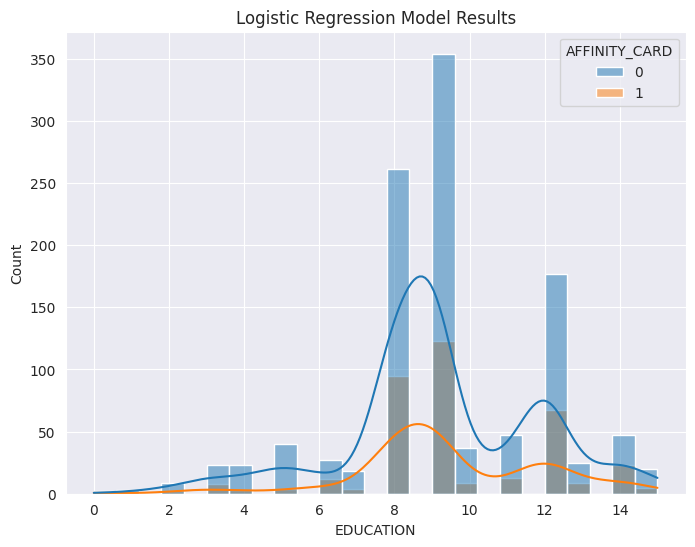

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Selecting the feature variable and the target variable
#Logistic Regression
X = df[['EDUCATION']]
y = df['AFFINITY_CARD']
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Build a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
#Evaluating the model
lr_score = accuracy_score(y_test, lr_model.predict(X_test))
print("Logistic Regression accuracy score:", lr_score)
#Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='EDUCATION', hue='AFFINITY_CARD', kde=True)
plt.title('Logistic Regression Model Results')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.show()

Random Forest Classifier accuracy score: 0.7388392857142857


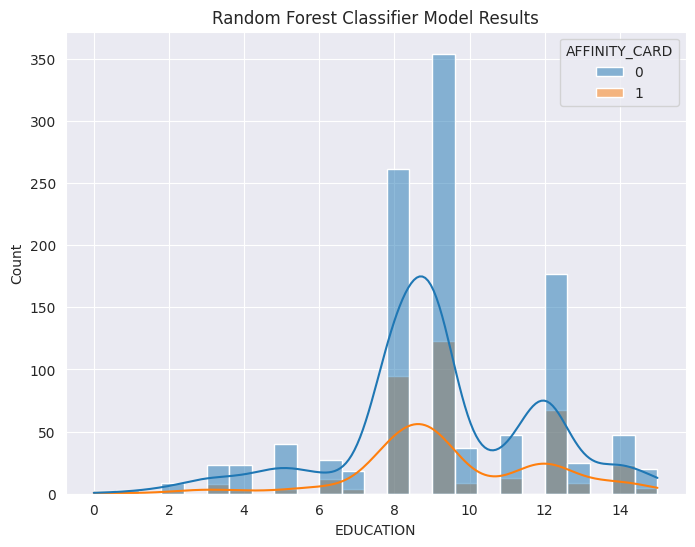

In [ ]:
#Selecting the feature variable and the target variable
X = df[['EDUCATION']]
y = df['AFFINITY_CARD']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Building a Random Forest Classifier model
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)
#Evaluating the model
rfc_score = accuracy_score(y_test, rfc_model.predict(X_test))
print("Random Forest Classifier accuracy score:", rfc_score)
#Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='EDUCATION', hue='AFFINITY_CARD', kde=True)
plt.title('Random Forest Classifier Model Results')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.show()

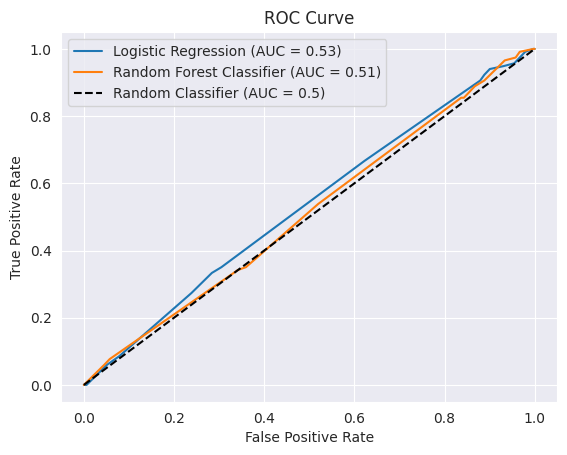

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#Calculating ROC curve and AUC for Logistic Regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
#Calculating ROC curve and AUC for Random Forest Classifier model
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_model.predict_proba(X_test)[:, 1])
rfc_auc = auc(rfc_fpr, rfc_tpr)
#Plotting ROC curves for both models
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (AUC = %0.2f)' % rfc_auc)
#Adding diagonal line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.5)')
#Adding labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()